<a href="https://colab.research.google.com/github/eemim/data-analytics_hw/blob/main/Teht%C3%A4v%C3%A402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Osa 1: Aikasarjat

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set_style('whitegrid')

In [ ]:
# Kirjastojen ja yfinancen asennuksen jälkeen tuodaan yfinancesta Kempower Oyj:n ja ChargePoint Holdings tiedot
kempo = yf.download('KEMPOWR.HE', start='2021-12-14')
charge = yf.download('CHPT', start='2021-12-14')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Päivät valikoituivat Kempower Oyj:n listautumisen mukaan. Aikaisempia tietoja ei ollut saatavilla.

Chargepoint Holdings toimii samalla alalla luoden sähköautojen latausteknologiaa. Erona näillä kuitenkin se, että Kempower pyrkii Suomen ja Euroopan markkinoiden lisäksi saamaan jalansijaa myös Yhdysvalloista. Yhdysvaltalainen ChargePoint taasen Euroopasta.

In [ ]:
# Tarkastetaan dataframe Kempowerista
kempo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-14,8.810000,8.900000,7.500000,7.950000,7.950000,2491645
2021-12-15,8.290000,8.541000,8.030000,8.150000,8.150000,450416
2021-12-16,8.300000,8.388000,8.201000,8.250000,8.250000,281287
2021-12-17,8.300000,8.380000,8.180000,8.180000,8.180000,143254
2021-12-20,8.180000,8.200000,7.940000,8.040000,8.040000,161383
...,...,...,...,...,...,...
2024-03-22,19.900000,20.000000,18.600000,19.549999,19.549999,234893
2024-03-25,19.500000,20.240000,19.309999,19.830000,19.830000,91203
2024-03-26,19.900000,20.500000,19.830000,20.400000,20.400000,147620


## Aikasarjojen kuvaajat

<Axes: xlabel='Date'>

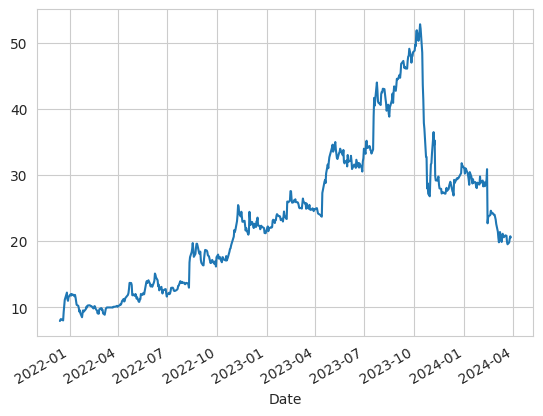

In [ ]:
kempo['Close'].plot()

<Axes: xlabel='Date'>

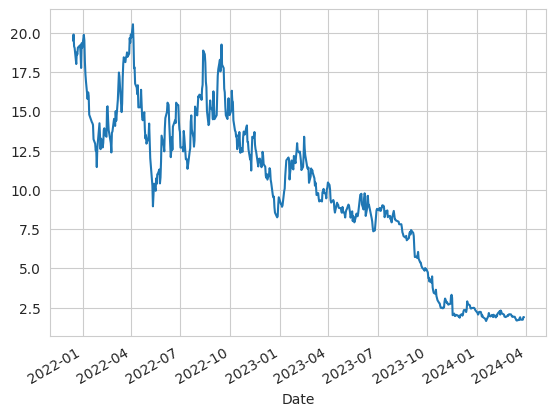

In [ ]:
charge['Close'].plot()

<Axes: xlabel='Date'>

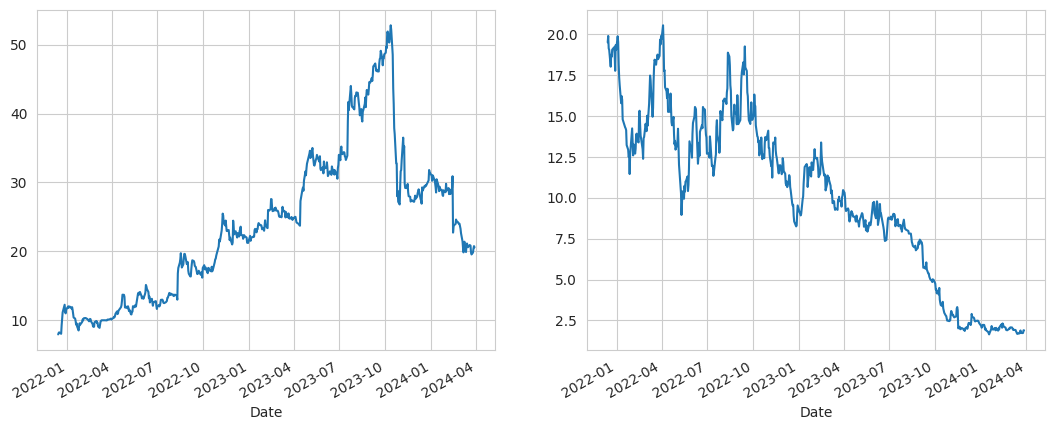

In [ ]:
# Tuodaan kuviot vierekkäin
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
kempo['Close'].plot(ax=ax[0])
charge['Close'].plot(ax=ax[1])

Tarkastellaan hintoja vielä samassa kaaviossa

Text(0.5, 1.0, 'Kempowerin ja ChargePoint Holdingsin osakkeiden hinnan kehitys')

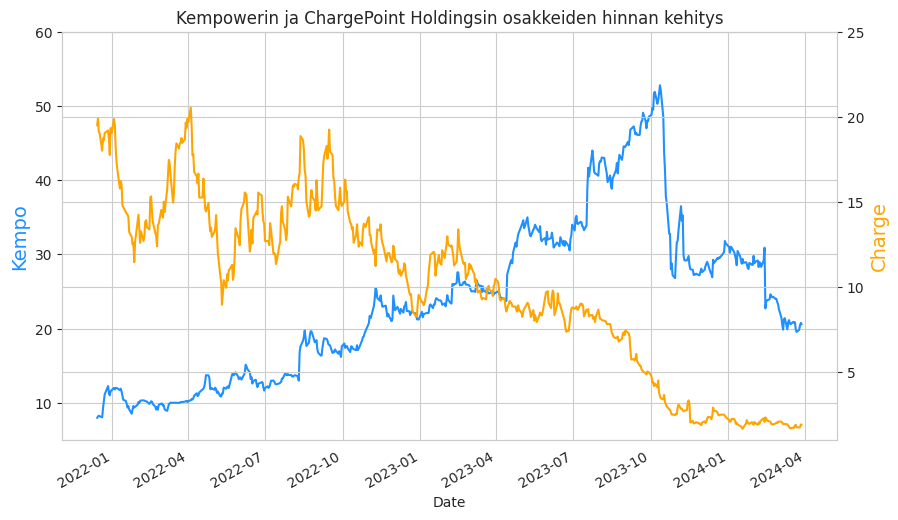

In [ ]:
plt.figure(figsize=(10, 6))

kem = kempo['Close'].plot(color='dodgerblue')
plt.ylabel('Kempo', color='dodgerblue', fontsize=14)
plt.ylim(5, 60)


cha = kem.twinx()
charge['Close'].plot(ax=cha, color='orange')
plt.ylabel('Charge', color='orange', fontsize=14)
plt.ylim(1, 25)

plt.title('Kempowerin ja ChargePoint Holdingsin osakkeiden hinnan kehitys')

Kempowerin tarkastelujakson alku on ollut selkeästi tasaisempaa kuin verrokilla ChargePoint Holdingsilla. Tämä luultavasti johtuu Kempowerin juuri suorittamasta listautumisesta, jolloin muutoskäyrät eivät välttämättä pompi kuten vanhemmalla CargePointilla.

Molemmissa on havaittavissa pudotusta vuodella 2023. ChargePointilla pudotus on jatkunut pidempään ja tasaisemmin, Kempowerilla se on ollut todella jyrkkä.

<Axes: xlabel='Date'>

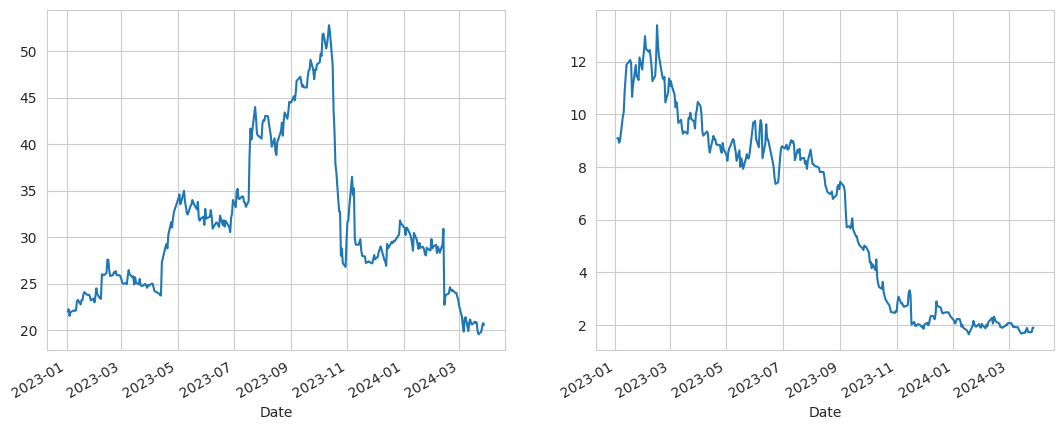

In [ ]:
# Tarkastellaan dataa vuodesta 2023 eteenpäin
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
kempo['Close']['2023':].plot(ax=ax[0])
charge['Close']['2023':].plot(ax=ax[1])

### Osakkeiden keskiarvot ja summat

<Axes: xlabel='Date'>

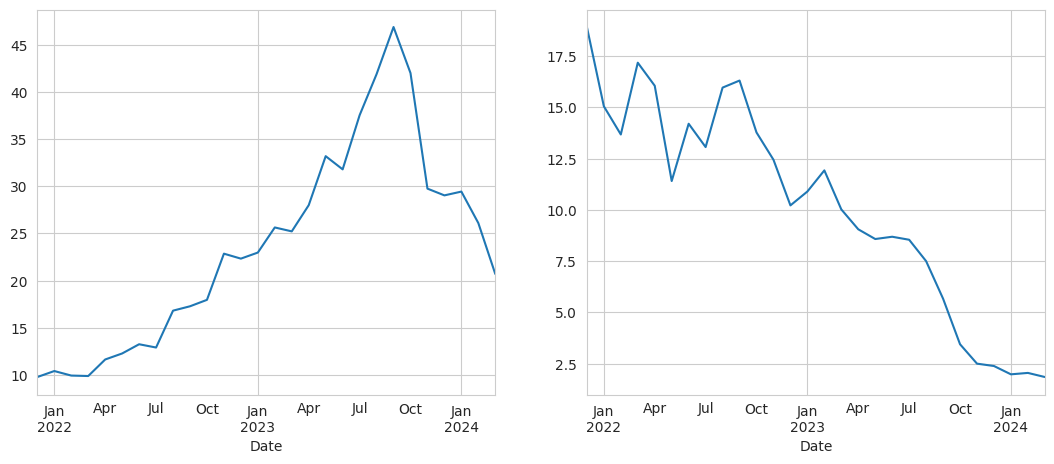

In [ ]:
# Käytetään edelleen hyväksi päätöshintoja ja lasketaan kuukausittaiset keskiarvot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
kempo['Close'].resample('M').mean().plot(ax=ax[0])
charge['Close'].resample('M').mean().plot(ax=ax[1])

Text(0, 0.5, 'Miljoonaa (kpl)')

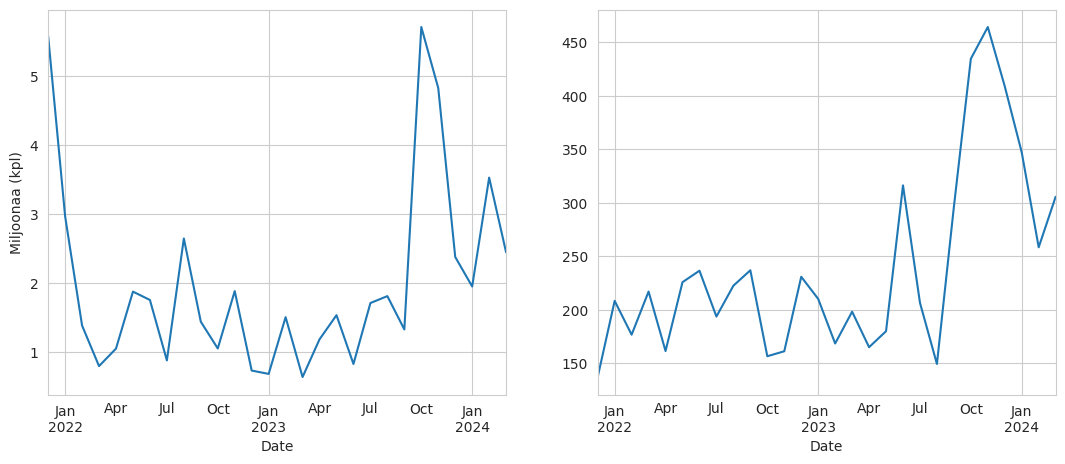

In [ ]:
# Vaihdon kokonaismäärät kuukausittain
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
(kempo['Volume']/1000000).resample('M').sum().plot(ax=ax[0])
(charge['Volume']/1000000).resample('M').sum().plot(ax=ax[1])
ax[0].set_ylabel('Miljoonaa (kpl)')


Vaikka tarkasteltavien osakkeiden vaihtomäärissä lukumäärittäin on valtavan suuri ero (kempo liikkuu miljoonissa, charge sadoissa miljoonissa), on käyrissä havaittavissa sama kaava. Nousut ja laskut osuvat lähes samoille ajoille ja loppuvuoden 2023 suuret vaihtomäärät tukevat myös aiemmin havaittuja osakkeiden kurssien pudotusta.

Kempowerin data on Helsingin pörssin mukainen, kun taas ChargePointin New Yorkin pörssin. Pienet eroavaisuudet vaihdon osumisessa tiettyyn ajanjaksoon saattavat olla selitettävissä tällä.

### Osakkeiden liukuvat keskiarvot

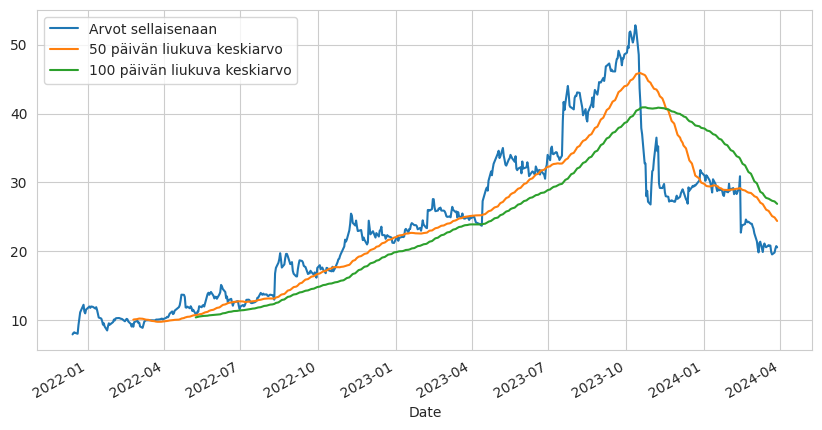

In [ ]:
# Verrataan Kempowerin liukuvaa keskiarvoa (50pv ja 100pv) tavallisiin arvoihin
kempo['Close'].plot(figsize=(10,5))
kempo['Close'].rolling(50).mean().plot()
kempo['Close'].rolling(100).mean().plot()

plt.legend(['Arvot sellaisenaan', '50 päivän liukuva keskiarvo', '100 päivän liukuva keskiarvo'])

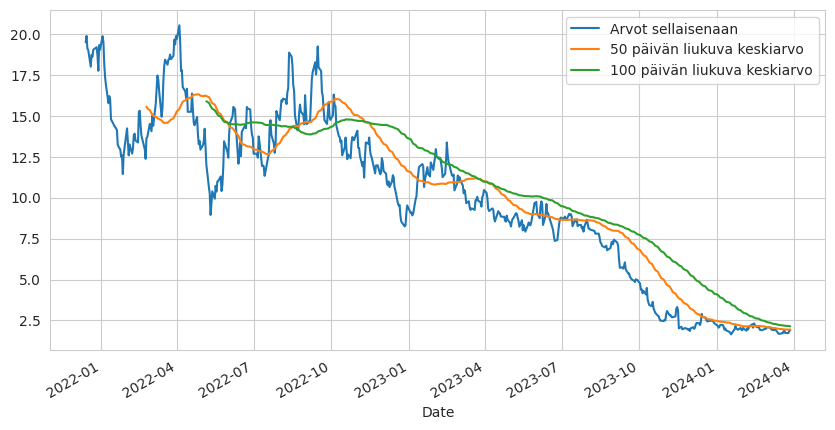

In [ ]:
# Verrataan ChargePointin liukuvaa keskiarvoa (50pv ja 100pv) tavallisiin arvoihin
charge['Close'].plot(figsize=(10,5))
charge['Close'].rolling(50).mean().plot()
charge['Close'].rolling(100).mean().plot()

plt.legend(['Arvot sellaisenaan', '50 päivän liukuva keskiarvo', '100 päivän liukuva keskiarvo'])

### Muutosprosentteja osakkeille

In [ ]:
kempo['Kempower%'] = kempo['Close'].pct_change()
charge['ChargePoint%'] = charge['Close'].pct_change()

kempo

,Open,High,Low,Close,Adj Close,Volume,Kempower%
Date,,,,,,,
2021-12-14,8.810000,8.900000,7.500000,7.950000,7.950000,2491645,NaN
2021-12-15,8.290000,8.541000,8.030000,8.150000,8.150000,450416,0.025157
2021-12-16,8.300000,8.388000,8.201000,8.250000,8.250000,281287,0.012270
2021-12-17,8.300000,8.380000,8.180000,8.180000,8.180000,143254,-0.008485
2021-12-20,8.180000,8.200000,7.940000,8.040000,8.040000,161383,-0.017115
...,...,...,...,...,...,...,...
2024-03-22,19.900000,20.000000,18.600000,19.549999,19.549999,234893,-0.016600
2024-03-25,19.500000,20.240000,19.309999,19.830000,19.830000,91203,0.014322
2024-03-26,19.900000,20.500000,19.830000,20.400000,20.400000,147620,0.028744


In [ ]:
# uusi dataframe muutosprosenteille
muutokset = pd.concat([kempo['Kempower%'], charge['ChargePoint%']], axis=1)
muutokset = muutokset.fillna(0)
muutokset

,Kempower%,ChargePoint%
Date,,
2021-12-14,0.000000,0.000000
2021-12-15,0.025157,0.020000
2021-12-16,0.012270,-0.038210
2021-12-17,-0.008485,-0.005227
2021-12-20,-0.017115,-0.053600
...,...,...
2024-03-22,-0.016600,-0.079365
2024-03-25,0.014322,-0.005747
2024-03-26,0.028744,0.005780


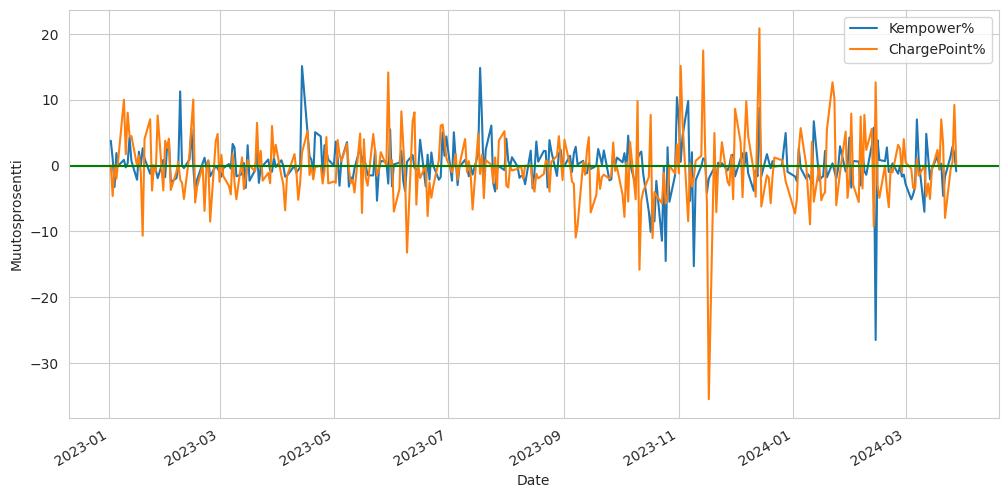

In [ ]:
# muutosprosentit vuodesta 2023 lähtien
(muutokset['2023':]*100).plot(figsize=(12, 6))
plt.ylabel('Muutosprosentti')
plt.axhline(color='green')

Muutosprosentti sahaa todella tiiviisti ja sieltä on vaikea havaita yhtäläisyyksiä tai muutosta, lukuunottamatta suuria pudotuksia tai nousuja. Tarkastellaan vuoden 2023 viimeisen neljänneksen muutosprosentteja.

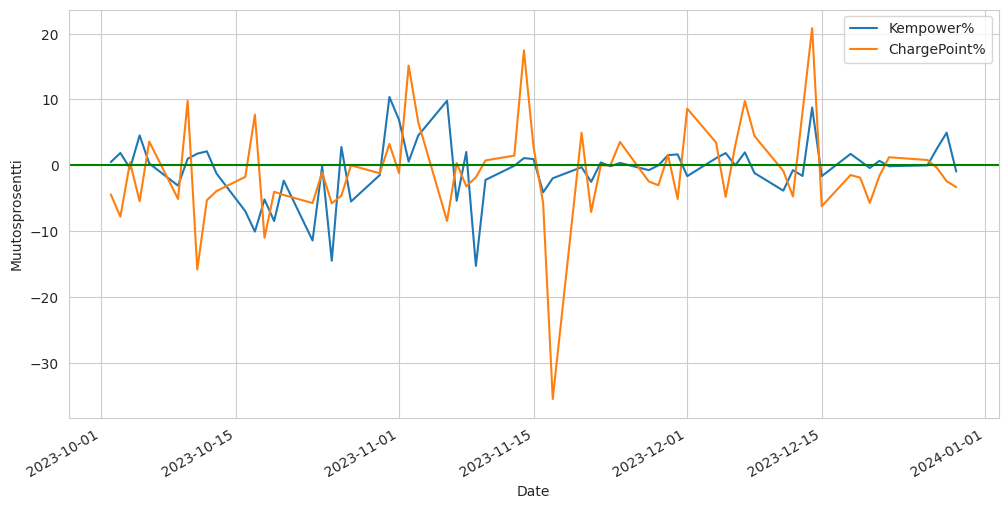

In [ ]:
(muutokset['2023-10-1': '2023-12-31']*100).plot(figsize=(12, 6))
plt.ylabel('Muutosprosentti')
plt.axhline(color='green')

Samankaltaisuutta muutosprosenteissa on hieman havaittavissa, mutta löytyy kaaviosta myös selkeitä vastakkaisuuksia

In [ ]:
# tarkastellaan tunnuslukuja muutosprosenteista
(muutokset*100).describe().round(2)

,Kempower%,ChargePoint%
count,592.00,592.00
mean,0.23,-0.25
std,3.75,5.23
min,-26.47,-35.46
25%,-1.64,-3.53
50%,0.00,-0.56
75%,1.85,2.66
max,29.31,20.83


<Axes: >

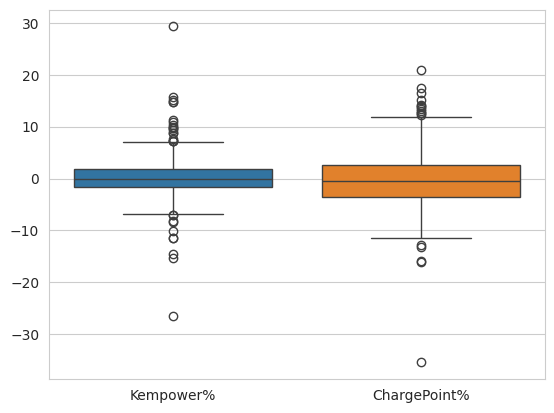

In [ ]:
sns.boxplot(data=muutokset*100)

In [ ]:
# poimitaan päivät, milloin suuret vaihtelut muutosprosenteissa ovat ilmentyneet
muutokset[(abs(muutokset['Kempower%'])>0.1) | (abs(muutokset['ChargePoint%'])>0.1)]

,Kempower%,ChargePoint%
Date,,
2021-12-21,0.156716,0.040533
2022-01-28,0.010695,0.104803
2022-02-15,0.016751,0.140508
2022-02-24,-0.039644,0.101777
2022-03-16,0.000000,0.103871
2022-04-27,-0.113701,-0.043259
2022-05-09,-0.056424,-0.113977
2022-05-11,0.037823,-0.128530
2022-05-23,0.108434,0.025408


In [ ]:
# yli kymmenen prosentin muutoksia oli yllättävän paljon, tarkastellaan vielä suuremmalla prosentilla
muutokset[(abs(muutokset['Kempower%'])>0.15) | (abs(muutokset['ChargePoint%'])>0.15)]

,Kempower%,ChargePoint%
Date,,
2021-12-21,0.156716,0.040533
2022-06-13,-0.030528,-0.160528
2022-07-28,0.012704,0.164384
2022-08-11,0.293149,0.015207
2023-04-14,0.150927,0.019883
2023-10-11,0.017717,-0.158129
2023-11-02,0.005693,0.151394
2023-11-09,-0.152667,-0.018248
2023-11-14,0.010966,0.174545


Samankaltaisuutta tuloksissa on havaittavissa aikasemman muutosprosenttikaavion kanssa. Positiiviset ja negatiiviset muutokset vaikuttaisivat osuvan osittain samoille ajankohdille, mutta toisaalta sieltä löytyy todella suuria eroavaisuuksia.

Tarkastellaan vielä muutosten korrelaatiota.

In [ ]:
muutokset.corr()

,Kempower%,ChargePoint%
Kempower%,1.000000,0.117227
ChargePoint%,0.117227,1.000000


Text(0, 0.5, 'Chargepoint muutos%')

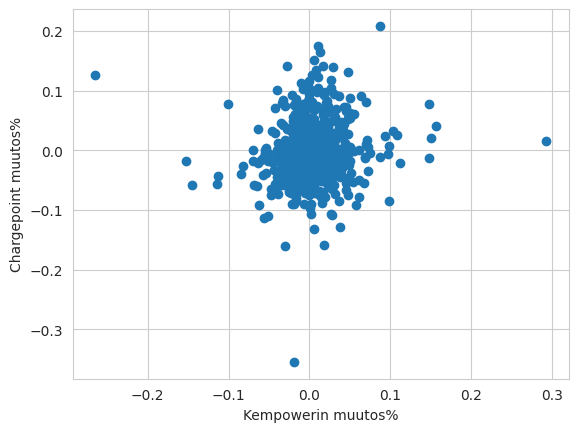

In [ ]:
plt.scatter(muutokset['Kempower%'], muutokset['ChargePoint%'])
plt.xlabel('Kempowerin muutos%')
plt.ylabel('Chargepoint muutos%')


Vaikka yritykset ovat saman alan toimijoita, on positiivista korrelaatiota todella vähän havaittavissa, jos ollenkaan.

<Axes: xlabel='Date'>

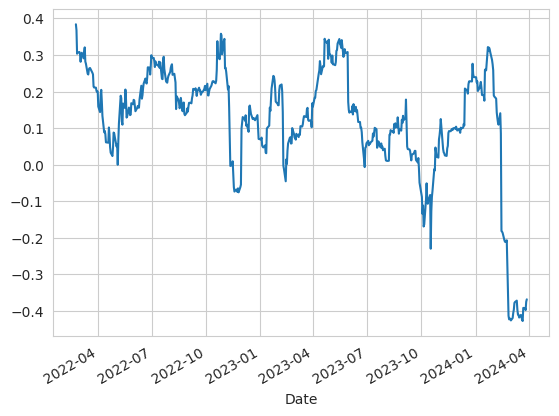

In [ ]:
# tarkastellaan myös liukuvalla korrelaatiolla
muutokset['Kempower%'].rolling(50).corr(muutokset['ChargePoint%']).plot()

Liukuvan korrelaation avulla huomataan, että muutosprosenttien välillä kuitenkin on suurimmaksi osaksi positiivinen korrelaatio


### Volatiliteetti
eli osakkeisiin liittyvä riski


<Axes: xlabel='Date'>

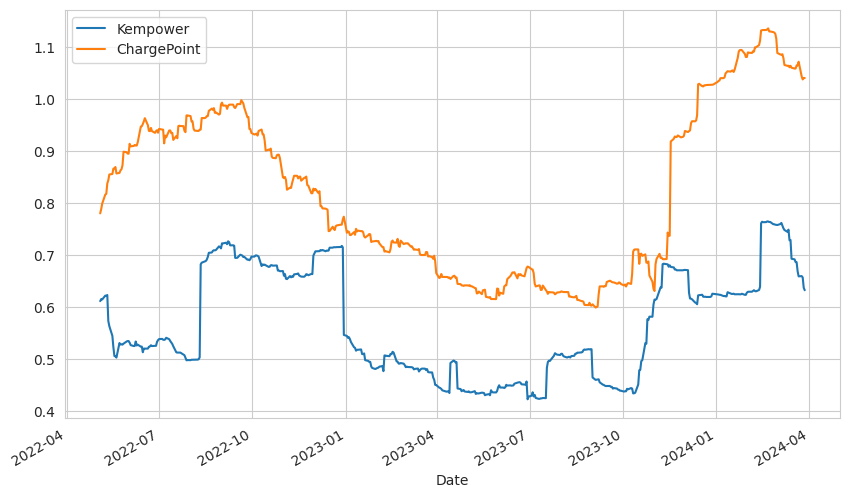

In [ ]:
# 100 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(muutokset['Kempower%'].rolling(100).std() * (252**0.5)).plot(label='Kempower', legend=True)
(muutokset['ChargePoint%'].rolling(100).std() * (252**0.5)).plot(label='ChargePoint', legend=True)

ChargePointilla on koko ajanjaksolla selkeästi suurempi volatiliteetti, joten se on sijoituksena riskialttiimpi.

# Osa 2: Aikasarjaennustaminen

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

df=pd.read_csv('beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


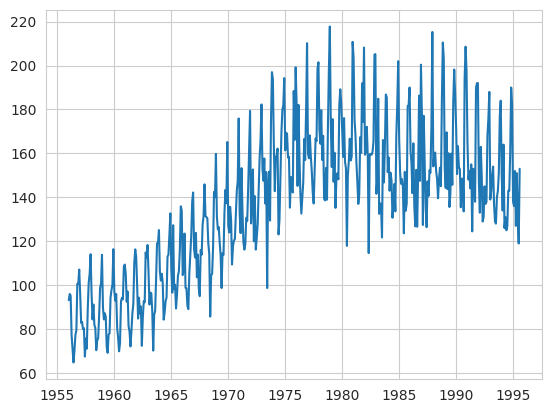

In [ ]:
plt.plot(df.index, df['Monthly beer production'])

Koska aikajänne datassa on laaja, on vaikea havannoida mihin kohtaan kausivaihtelut osuvat (vaikka sillä ei tässä välttämättä ole väliä). Katsotaan mielenkiinnosta näkyisikö se pienemmällä aikavälillä. Otetaan otos suunnilleen aikasarjan puolestavälistä.

<Axes: xlabel='Month'>

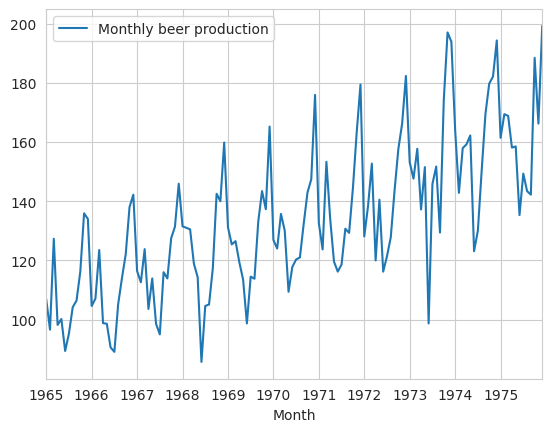

In [ ]:
df_supistettu = df['1965' : '1975']
df_supistettu.plot()

Huomataan, että selkeää kausivaihtelua on havaittavissa vuosittain. Tiputus vuoden puolivälissä ja nousu vuodenvaihteen paikkeilla.

Aikasarjasta (/-sarjoista) vaikuttaisi löytyvän trendi sekä kausivaihtelua. Tarkastellaan vielä komponentteja.

[]

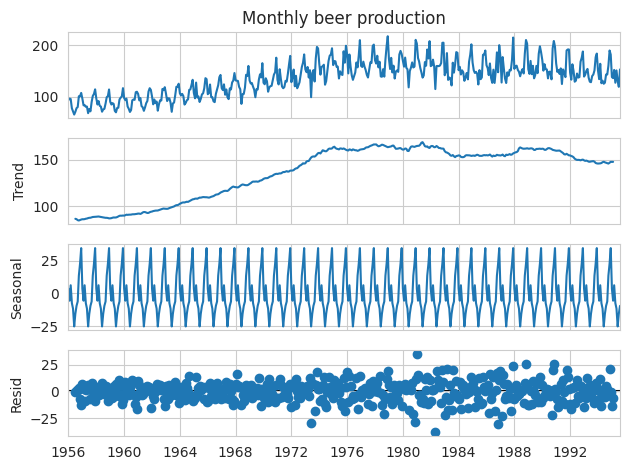

In [ ]:
seasonal_decompose(df['Monthly beer production']).plot()
plt.plot()

[]

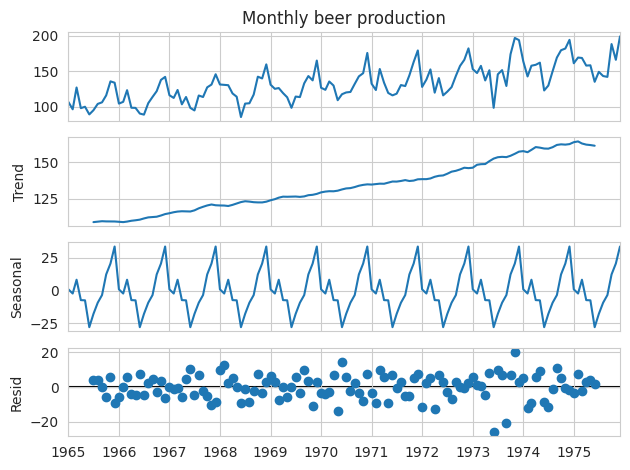

In [ ]:
seasonal_decompose(df_supistettu['Monthly beer production']).plot()
plt.plot()

Koska datassa on trendi sekä kausivaihtelua, käytetään kolminkertaista eksponentiaalista tasoitusta sen käsittelemiseen.

In [ ]:
df3 = ExponentialSmoothing(df['Monthly beer production'], trend='add', seasonal='mul', seasonal_periods=12, freq='MS').fit()

In [ ]:
df['Ennuste'] = df3.fittedvalues
df.tail(10)

,Monthly beer production,Ennuste
Month,,
1994-11-01,190.0,167.337518
1994-12-01,182.0,181.685536
1995-01-01,138.0,148.811996
1995-02-01,136.0,138.467124
1995-03-01,152.0,150.348182
1995-04-01,127.0,135.855629
1995-05-01,151.0,131.396371
1995-06-01,130.0,118.905896
1995-07-01,119.0,129.351617


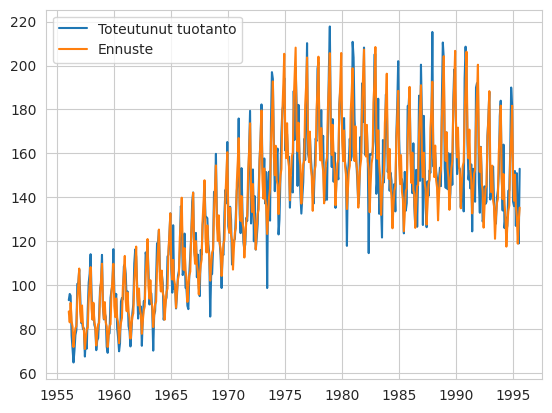

In [ ]:
plt.plot(df.index, df['Monthly beer production'], label='Toteutunut tuotanto')
plt.plot(df.index, df['Ennuste'], label='Ennuste')
plt.legend()

ExponentialSmoothingin kausivaihtelun summamalli antoi paremman vastaavuuden aikasarjan alussa, mutta tulomalli paremman vastaavuuden loppupuolella. Tässä tapauksessa päätettiin käyttää tulomallia juuri siitä syystä, että se oli tarkempi loppupuolella.

*Myös myöhemmin esiintyvä ennustevirhe-kaavio antoi vähemmän suuria eroavaisuuksia tulomallilla*

Toki mallit olisi ilmeisesti voinut myös yhdistää jotenkin, mutta siihen ei nähty tarvetta, sillä erot eivät niin suuria olleet.

### Mallin hyvyyden tarkastelu

In [ ]:
df['Ennustevirhe'] = df3.resid
df.head()

,Monthly beer production,Ennuste,Ennustevirhe
Month,,,
1956-01-01,93.2,88.024488,5.175512
1956-02-01,96.0,83.084688,12.915312
1956-03-01,95.2,91.956006,3.243994
1956-04-01,77.1,83.620554,-6.520554
1956-05-01,70.9,81.134365,-10.234365


Text(0, 0.5, 'Ennustevirhe')

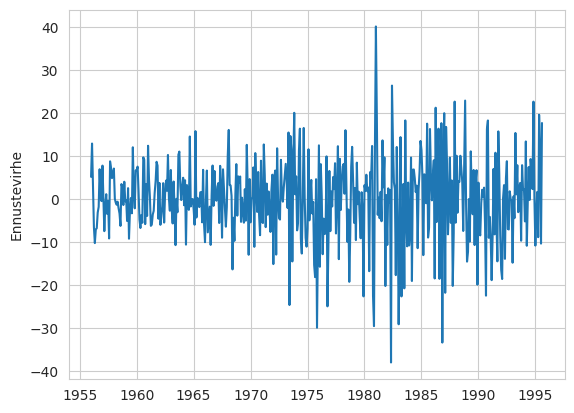

In [ ]:
plt.plot(df.index, df['Ennustevirhe'])
plt.ylabel('Ennustevirhe')

Ennustevirheet vaikuttavat satunnaisilta, suurimmat virhearvotkin osuvat melkein samoihin lukuihin.

Tarkastellaan myös hajontakuviolla toteutuneita arvoja verrattuna ennusteisiin

Text(0, 0.5, 'Ennuste')

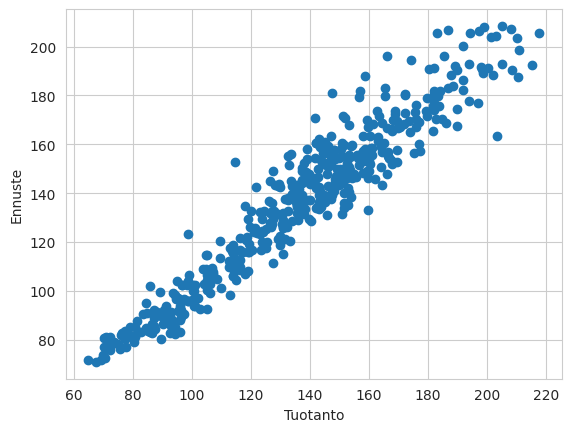

In [ ]:
plt.scatter(df['Monthly beer production'], df['Ennuste'])
plt.xlabel('Tuotanto')
plt.ylabel('Ennuste')

Myös hajontakuvio näyttää suhteellisen hyvältä, vaikka pientä hajontaa on havaittavissa.

In [ ]:
df3.summary()

Dep. Variable:,Monthly beer production,No. Observations:,476
Model:,ExponentialSmoothing,SSE,44078.699
Optimized:,True,AIC,2187.478
Trend:,Additive,BIC,2254.124
Seasonal:,Multiplicative,AICC,2188.974
Seasonal Periods:,12,Date:,"Fri, 29 Mar 2024"
Box-Cox:,False,Time:,14:37:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0869314,alpha,True
smoothing_trend,0.0860465,beta,True


SSE oli reilut 44000, mikä vaikuttaisi tässä tapauksessa kohtalaisen pieneltä ja hyvältä luvulta.

 Kuten aikasemmista kaavioista pääteltiin, antoi tulomalli tässä pienemmän luvun kuin summamalli.

### Ennusteiden laskeminen

In [ ]:
# viimeinen aikaleima
df.tail()

,Monthly beer production,Ennuste,Ennustevirhe
Month,,,
1995-04-01,127.0,135.855629,-8.855629
1995-05-01,151.0,131.396371,19.603629
1995-06-01,130.0,118.905896,11.094104
1995-07-01,119.0,129.351617,-10.351617
1995-08-01,153.0,135.314539,17.685461


In [ ]:
# ennusteet seuraaville aikaleimoille
aikaleimat = pd.date_range('1995-09-01', periods=28, freq='MS')

ennusteet3 = df3.forecast(28)

df_ennusteet3 = pd.DataFrame(data=ennusteet3, index=aikaleimat, columns=['Ennuste'])
df_ennusteet3.tail()

,Ennuste
1997-08-01,138.490706
1997-09-01,140.636583
1997-10-01,162.432002
1997-11-01,172.536992
1997-12-01,185.339193


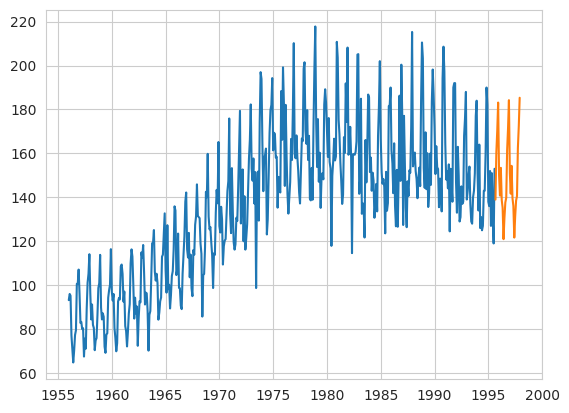

In [ ]:
plt.plot(df.index, df['Monthly beer production'])
plt.plot(df_ennusteet3.index, df_ennusteet3['Ennuste'])

Ennuste näyttää uskottavalta